In [1]:
import numpy as np
from scipy.linalg import norm
from KL_divergence import KL_divergence
from Likelihood import Likelihood
from SDTgen import SDTgen
from Dprime import Dprime
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format
import warnings
warnings.filterwarnings("ignore")
plt.style.use('ggplot')
%matplotlib notebook

# Q1A

<IPython.core.display.Javascript object>


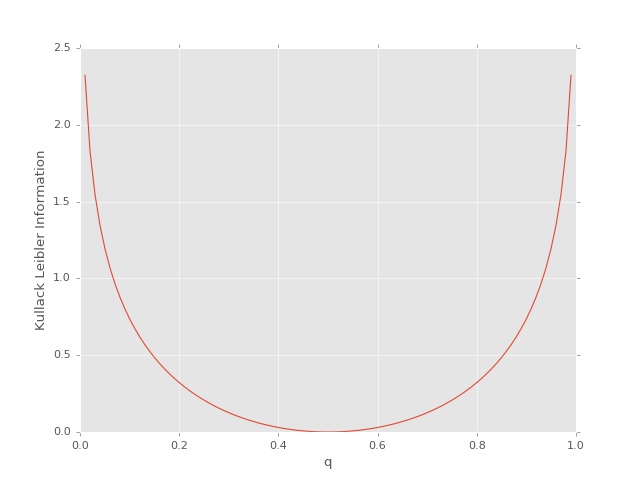

In [2]:
q = 0.5
p = np.linspace(0,1,100)
KL = KL_divergence(q,p)
plt.figure(1)
plt.plot(p,KL)
plt.xlabel('q')
plt.ylabel('Kullack Leibler Information')

# Discussion of Q1A:
<br />As being said in E: another interpretation of KL(p|q) is the amount of information in bits lost when we use q as an approximation to p. In this sense, when q is 0.5, the best performance of this approximation is when the true p is also 0.5. As the true p becomes more different from 0.5, the amount of informaton in bits lost becomes more and more. 

# Q1B

<IPython.core.display.Javascript object>


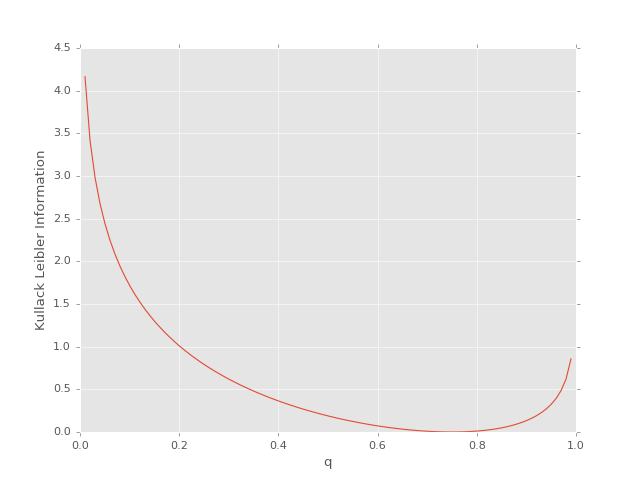

In [3]:
q = 0.75
p = np.linspace(0,1,100)
KL = KL_divergence(q,p)
plt.figure(2)
plt.plot(p,KL)
plt.xlabel('q')
plt.ylabel('Kullack Leibler Information')

# Discussion Q1B
<br />Similiar to Q1A, but this time, the prior information about q is that q is 0.75 now. Based on the interpretation of KL divergence, it is not surprised that the approximation is skewed to center at 0.75. 

# Q1C

What is KL of p given p?
<br />KL of p given p is to use p itself to approximate p, and KL measures the bits of information gained/lost of this approximate. In this case, KL of p given p means no information gained/lost in this approximation, because the the true parameter and the estimated parameter are the same.

# Q1D

<IPython.core.display.Javascript object>


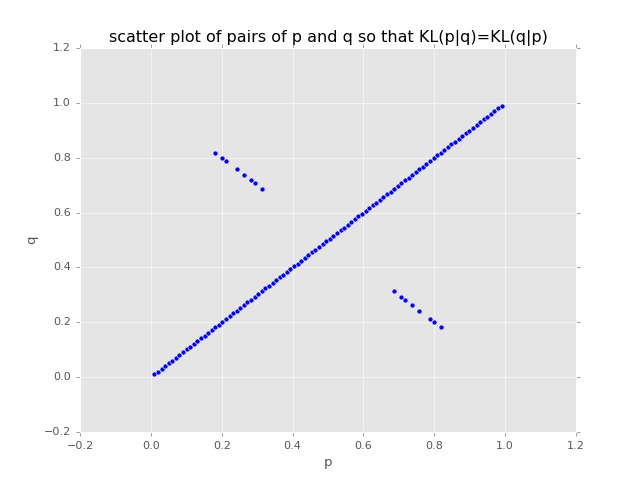

<IPython.core.display.Javascript object>


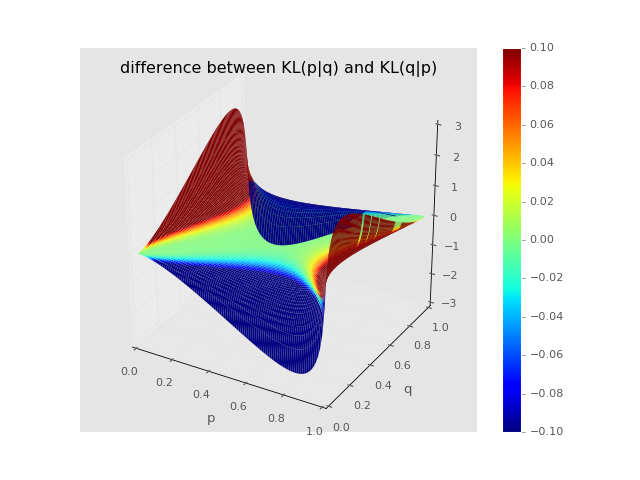

In [4]:
q = np.linspace(0,1,100)
p = np.linspace(0,1,100)
KL_p_given_q=[];KL_q_given_p=[]
for p_cadicate in p:
    KL_p_given_q.append(KL_divergence(p_cadicate,q))
    KL_q_given_p.append(KL_divergence(q,p_cadicate))
KL_difference = np.array(KL_p_given_q)-np.array(KL_q_given_p)
[pp,qq]=np.meshgrid(p,q)
plt.figure(3)
ST=np.where(KL_difference == 0)
plt.scatter(pp[ST[0],ST[1]],qq[ST[0],ST[1]])
plt.xlabel('p');plt.ylabel('q');plt.title('scatter plot of pairs of p and q so that KL(p|q)=KL(q|p)')
fig = plt.figure(4)
ax = fig.add_subplot(111, projection='3d')
surf=ax.plot_surface(pp,qq,KL_difference,rstride=1, cstride=1, cmap=cm.jet, linewidth=0)
plt.xlabel('p');plt.ylabel('q');plt.title('difference between KL(p|q) and KL(q|p)')
fig.colorbar(surf)

In [5]:
ST2 = pp[ST[0],ST[1]] != qq[ST[0],ST[1]]
special_case = pd.DataFrame({'p':pp[ST[0],ST[1]][ST2],'q':qq[ST[0],ST[1]][ST2]})
special_case['KL(p|q)']=KL_divergence(special_case['q'],special_case['p'])
special_case['KL(q|p)']=KL_divergence(special_case['p'],special_case['q'])
special_case['sum']=special_case['p']+special_case['q']
print(special_case)

      p    q  KL(p|q)  KL(q|p)  sum
0  0.82 0.18     1.38     1.38 1.00
1  0.80 0.20     1.18     1.18 1.00
2  0.79 0.21     1.09     1.09 1.00
3  0.76 0.24     0.85     0.85 1.00
4  0.74 0.26     0.71     0.71 1.00
5  0.72 0.28     0.58     0.58 1.00
6  0.71 0.29     0.53     0.53 1.00
7  0.69 0.31     0.42     0.42 1.00
8  0.31 0.69     0.42     0.42 1.00
9  0.29 0.71     0.53     0.53 1.00
10 0.28 0.72     0.58     0.58 1.00
11 0.26 0.74     0.71     0.71 1.00
12 0.24 0.76     0.85     0.85 1.00
13 0.21 0.79     1.09     1.09 1.00
14 0.20 0.80     1.18     1.18 1.00
15 0.18 0.82     1.38     1.38 1.00


# Discussion Q1D
<br />First I allocate 100 samples of p's and q's, and then I measure the KL divergence of each pair of p's and q's. By plotting the figure 4, I realize, when KL(q|p) = KL(p|q), the pairs of p's and q's might locate at the hyperplane of p and q along the diagnal. Figure 3 confirms my speculation. The diagnal line from southwest to northeast are the pairs of p's and q's that are equal. When the two values are equal, KL divergence must be zero, no matter which one is the prior information. 
<br />The more intersting observation would the other diagnal line that goes from northwest to southeast. What are so special of them? The fact that the sum of them are always 1 makes them interchangeable in the n=2 KL divergence formula. 
<br />If I increase the resolution of the p's and q's, I guess I could find a lot more p's and q's the add up to 1 so that KL(q|p) = KL(p|q). 

# Q2

<IPython.core.display.Javascript object>


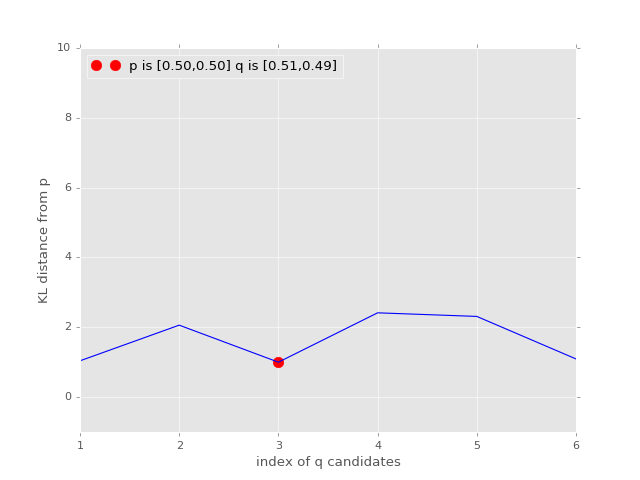

(-1, 10)

In [14]:
k = 6
p = np.array([0.5,0.5]).astype(float)
q=[];KL=[]
for i in range(k):
    term = np.random.rand(1)
    temp = np.append(term,1-term)
    q.append(temp)
    KL.append(0-np.dot(p,np.log2(temp)))
plt.figure(5)
min_index = np.where(np.array(KL)==min(np.array(KL)))[0][0]
qq = q[min_index]
strings = 'p is [%.2f,%.2f] q is [%.2f,%.2f]'%tuple(np.append(p,qq))
plt.plot(min_index,KL[min_index],'r.',markersize=19,label=strings)
plt.legend(loc='upper left')
plt.plot(KL,'b-');plt.xticks(np.arange(6),['1','2','3','4','5','6'])
plt.xlabel('index of q candidates')
plt.ylabel('KL distance from p')
plt.ylim([-1,10])

In [15]:
distance=[];summary_tabel=[]
for vec in q:
    dis=np.sqrt((vec[0]-p[0])**2 + (vec[1]-p[1])**2)
    distance.append(dis)
summary_tabel=pd.DataFrame({'q':q,'distance between p and q':distance})
summary_tabel=summary_tabel.sort(['distance between p and q'],ascending=[True])
summary_tabel

,distance between p and q,q
2,0.02,"[0.511157317282, 0.488842682718]"
0,0.16,"[0.615124028233, 0.384875971767]"
5,0.25,"[0.326194327733, 0.673805672267]"
1,0.62,"[0.93879045908, 0.0612095409204]"
4,0.65,"[0.042412298926, 0.957587701074]"
3,0.66,"[0.0365452039829, 0.963454796017]"


# Discussion Q2
<br />Since the first term of KL divergence could be treated as a constant, I set it as zero. And the second term of the KL divergence is the inner product of vector p and vector log(q). If I draw q's from uniform distribution, the value of each element in vector q is between 0 and 1, and the two elements add up to 1. The best guess of q using the knowledge that p is [.5 .5] is when the true q is close/equal to p. The KL divergence can be prdicted by the geometric distance between vector p and vector log(q). 

# Q3A

[[ 1.     0.     0.   ]
 [ 0.     1.     0.   ]
 [ 0.     0.005  0.995]]


<IPython.core.display.Javascript object>


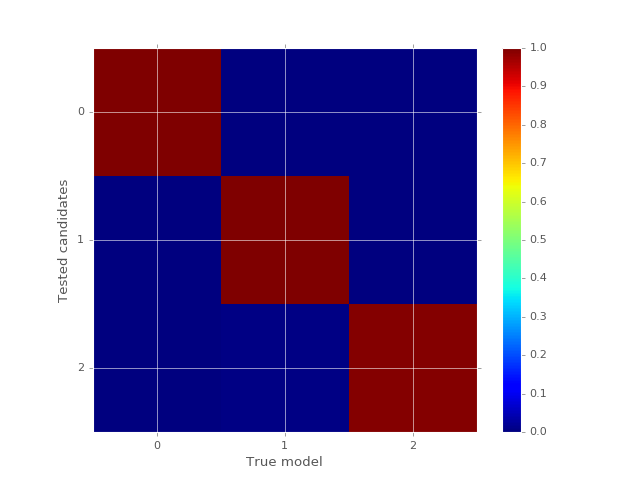

In [8]:
dp = np.array([0,1,2])
n = 1000
result=[]
AIC=[]
summary_events=[]
nSignal=200;nNoSignal=nSignal
result = np.zeros((n,4,len(dp)))
AIC=np.zeros((n,3,3))
summary_events=np.zeros((n,len(dp)))
cnt=0
for k in dp:
    for ii in range(n):
        result[ii,0,cnt],result[ii,1,cnt],result[ii,2,cnt],result[ii,3,cnt]=SDTgen(k,k/2,nSignal,nNoSignal,flag=0)
        a,b,c,d=[result[ii,0,cnt],result[ii,1,cnt],result[ii,2,cnt],result[ii,3,cnt]]
        AIC[ii,0,cnt]=-2*np.log(Likelihood(0,[a,b,c,d]))+2+(2*3)/(400-3)
        AIC[ii,1,cnt]=-2*np.log(Likelihood(1,[a,b,c,d]))+2+(2*3)/(400-3)
        AIC[ii,2,cnt]=-2*np.log(Likelihood(2,[a,b,c,d]))+2+(2*3)/(400-3)
        summary_events[ii,cnt]=np.where(AIC[ii,:,cnt]==AIC[ii,:,cnt].min(axis=0))[0][0]
    cnt +=1
    
Con_matrix = np.zeros((3,3))
for ii in range(3):
    for jj in range(3):
        Con_matrix[ii,jj]=sum(summary_events[:,ii]==jj)/n
print(Con_matrix)
        
plt.figure(6)
plt.imshow(Con_matrix, interpolation='nearest')
plt.xticks(np.arange(0,3), ['0','1','2'])
plt.yticks(np.arange(0,3), ['0','1','2'])
plt.xlabel('True model')
plt.ylabel('Tested candidates')
plt.colorbar()

# Discussion Q3A
<br />After selected the "true d prime" (0,1,2), I simulate hit, miss, FA, and CR and calculate the AIC for all candidate d primes. I select the lowest value for the "best" model. I hypothesize that the chosen "true model" wouls yeild the same parameter for the "best model". Turns out some interesting result:
<br />Only the true model is selected when the true model was used to generate data. It makes sense, because if the other models were true instead of the true model, there could be: 1) the SDT generator is biased, or 2) the model selection criteria are biased. 
<br />Before my correction of my SDTgen, I got some biased data that when d=2 is the true model, the simulation is in favor of d=1 over d=2. Apply the logic mentioned above, I realize my SDTgen is biased. After the correction, I could confirm my hypothesis. 

<IPython.core.display.Javascript object>


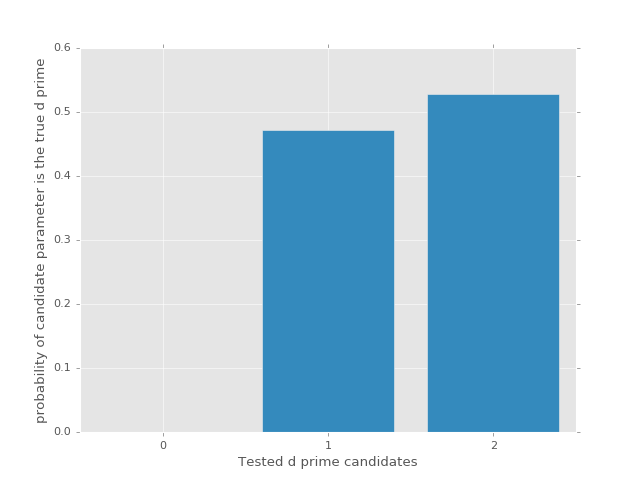

In [9]:
dp=1.5
n=1000
nSignal=200;nNoSignal=200
result=np.zeros((n,4))
summary_events=np.zeros(n)
AIC=np.zeros((n,3))
width = 0.8 
for ii in range(n):
    result[ii,0],result[ii,1],result[ii,2],result[ii,3]=SDTgen(dp,dp/2,nSignal,nNoSignal,flag=0)
    a,b,c,d=[result[ii,0],result[ii,1],result[ii,2],result[ii,3]]
    AIC[ii,0]=-2*np.log(Likelihood(0,[a,b,c,d]))+2+(2*3)/(400-3)
    AIC[ii,1]=-2*np.log(Likelihood(1,[a,b,c,d]))+2+(2*3)/(400-3)
    AIC[ii,2]=-2*np.log(Likelihood(2,[a,b,c,d]))+2+(2*3)/(400-3)
    summary_events[ii] = np.where(AIC[ii,:] == min(AIC[ii,:]))[0][0]
probability=[]
for jj in range(3):
    probability.append(sum((summary_events==jj).astype(int))/n)
plt.figure(7)
plt.bar(np.arange(3)- width/2.,probability,width)
plt.xticks(np.arange(3),['0','1','2'])
plt.xlabel('Tested d prime candidates')
plt.ylabel('probability of candidate parameter is the true d prime')

# Discussion Q3B
<br />If the SDTgen is not biased, the prior hypothesis of selecting candidates [0 1 2] given the true one is 1.5 could be very competitive between 1 and 2. In other words, the probability that d=1 is true and the probability that d=2 is true are the same and they are 50%. 
<br />The result strongly supports my hypothesis. 

# Q4A

In [10]:
dp=1;c=0.5;nSignal=20;nNoSignal=200;
nHit,nMiss,nFA,nCR=SDTgen(dp,c,nSignal,nNoSignal,0)
result_matrix=np.array([[nHit,nMiss],[nFA,nCR]])
dhat0,chat0=Dprime([nHit,nMiss,nFA,nCR])

# Discussion Q4A
<br />Simulating one time of the experiment, and let the $\hat{d}$ and $\hat{c}$ be our "best guess" of the true d and c.

# Q4B-C

<IPython.core.display.Javascript object>


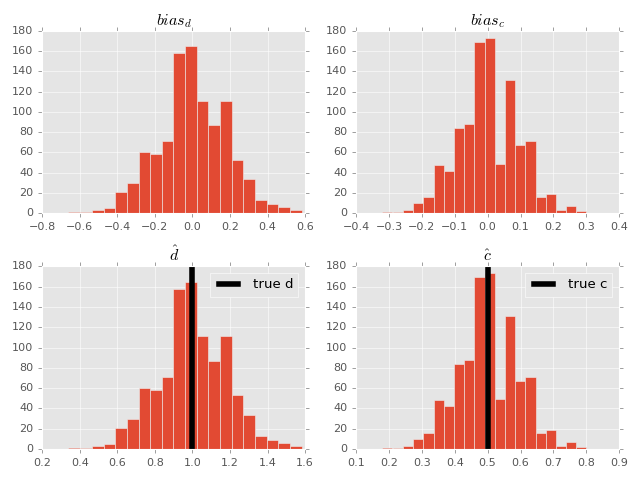

In [11]:
n=1000
dhat=np.zeros(n);chat=np.zeros(n)
for ii in range(n):
    nHit,nMiss,nFA,nCR=SDTgen(dp,c,nSignal,nNoSignal,0)
    dhat[ii],chat[ii]=Dprime([nHit,nMiss,nFA,nCR])
estimate = pd.DataFrame({'$\hat{d}$':dhat,'$\hat{c}$':chat})
estimate['$bias_d$']=estimate['$\hat{d}$']-dp
estimate['$bias_c$']=estimate['$\hat{c}$']-c
mean_d=estimate['$\hat{d}$'].mean()
std_d=estimate['$\hat{d}$'].std()
mean_c=estimate['$\hat{c}$'].mean()
std_c=estimate['$\hat{c}$'].std()
plt.figure(8)
plt.subplot(221);plt.hist(estimate['$bias_d$'],20);plt.title('$bias_d$')
plt.subplot(222);plt.hist(estimate['$bias_c$'],20);plt.title('$bias_c$')
plt.subplot(223);plt.hist(estimate['$\hat{d}$'],20);plt.title('$\hat{d}$')
plt.axvline(x=dp,linewidth=5,color='k',label='true d')
plt.legend()
plt.subplot(224);plt.hist(estimate['$\hat{c}$'],20);plt.title('$\hat{c}$')
plt.axvline(x=c,linewidth=5,color='k',label='true c')
plt.legend()
plt.tight_layout()

# Discussion Q4B-C
<br />Of course bootstrapping could capture the "true parameters" most of time. However, I am thinking that what if some of my subjects are really biasing my results, and what could that happen to the bootstrapping procedure? My answer is that unless half of my results are biased results, and they all bias to one side, otherwise, the resampling procedure will be in favor of the majority of reasonable data points. 
<br />In this simulation, we use d=1 and c=0.5. My maximum likelihood estimation of $\hat{d}$ and $\hat{c}$ is over 1000 data points in between 0 to 20 and calculate the likelihood. I am confident that this represnts the best likelihood of parameter estimation. Doing this estimation over 1000 times, the distribution of the results will center at the true parameters as it shows above. 

# Q4D

<IPython.core.display.Javascript object>


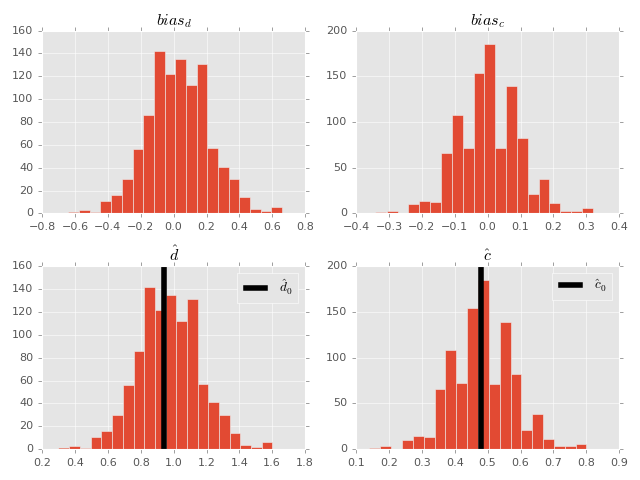

In [12]:
dp=dhat0;c=chat0;nSignal=200;nNoSignal=nSignal;
n = 1000;
dhat=np.zeros(n);chat=np.zeros(n)
for ii in range(n):
    nHit,nMiss,nFA,nCR=SDTgen(dp,c,nSignal,nNoSignal,0)
    dhat[ii],chat[ii]=Dprime([nHit,nMiss,nFA,nCR])
estimate = pd.DataFrame({'$\hat{d}$':dhat,'$\hat{c}$':chat})
estimate['$bias_d$']=estimate['$\hat{d}$']-dp
estimate['$bias_c$']=estimate['$\hat{c}$']-c
mean_d=estimate['$\hat{d}$'].mean()
std_d=estimate['$\hat{d}$'].std()
mean_c=estimate['$\hat{c}$'].mean()
std_c=estimate['$\hat{c}$'].std()
plt.figure(9)
plt.subplot(221);plt.hist(estimate['$bias_d$'],20);plt.title('$bias_d$')
plt.subplot(222);plt.hist(estimate['$bias_c$'],20);plt.title('$bias_c$')
plt.subplot(223);plt.hist(estimate['$\hat{d}$'],20);plt.title('$\hat{d}$')
plt.axvline(x=dp,linewidth=5,color='k',label='$\hat{d}_0$')
plt.legend()
plt.subplot(224);plt.hist(estimate['$\hat{c}$'],20);plt.title('$\hat{c}$')
plt.axvline(x=c,linewidth=5,color='k',label='$\hat{c}_0$')
plt.legend()
plt.tight_layout()

# Discussion Q4D
<br />If we use $\hat{d}$ and $\hat{c}$ as the true parameters to simulate the experiment, our "true belief" is changed to the first guess of the parameters. Of course the distribution of the estiamte will center at $\hat{d}_0$ and $\hat{c}_0$. Does this telling us the bootstrap working poorly? No. Instead, the bootstrap captures the parameters we use to generate the data. 